# This is an example of supervised Machine Learning Fraud Detection Notebook!

Enjoy!

In [86]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

## Exploration Data Analysis

In [87]:
data = pd.read_csv('conversion_data_train.csv')
print('Set with labels (our train+test) :', data.shape)

Set with labels (our train+test) : (284580, 6)


In [88]:
data.describe()

,age,new_user,total_pages_visited,converted
count,284580.000000,284580.000000,284580.000000,284580.000000
mean,30.564203,0.685452,4.873252,0.032258
std,8.266789,0.464336,3.341995,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [89]:
data.groupby(['country','new_user']).mean()

age  total_pages_visited  converted
country new_user                                           
China   0         30.734433             4.567053   0.002693
        1         30.633709             4.544956   0.000683
Germany 0         30.301195             5.986189   0.140505
        1         30.532417             4.837916   0.025353
UK      0         30.215854             5.713430   0.112846
        1         30.536859             4.778442   0.023908
US      0         30.359634             5.404230   0.083870
        1         30.659963             4.711209   0.016474

<AxesSubplot:xlabel='source', ylabel='converted'>

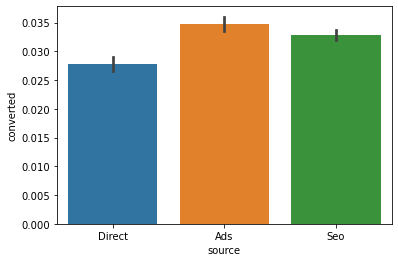

In [90]:
sns.barplot(x="source", y="converted", data=data)

<AxesSubplot:xlabel='country', ylabel='converted'>

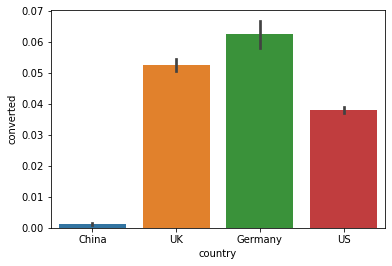

In [91]:
sns.barplot(x="country", y="converted", data=data)

<AxesSubplot:xlabel='country', ylabel='new_user'>

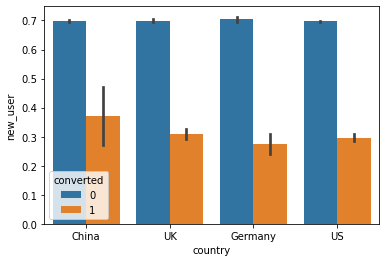

In [92]:
sns.barplot(x="country", y="new_user", data=data,hue='converted')

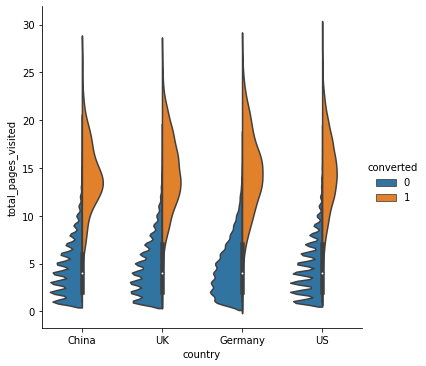

In [93]:
sns.catplot(data=data, kind="violin", x="country", y="total_pages_visited", hue="converted",split=True)

Obviously, converted users visits website more often than unconverted ones.

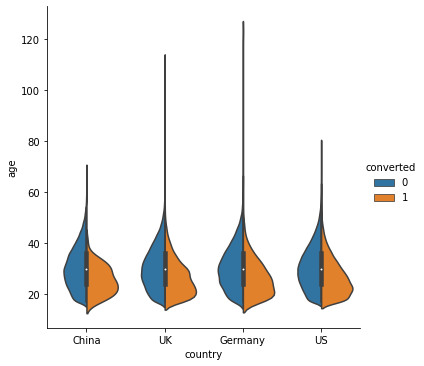

In [94]:
sns.catplot(data=data, kind="violin", x="country", y="age", hue="converted",split=True)

Converted users are younger in average than unconverted ones.

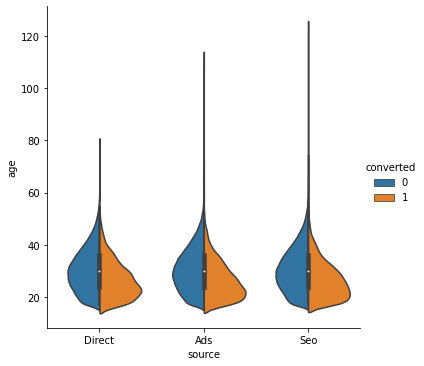

In [95]:
sns.catplot(data=data, kind="violin", x="source", y="age", hue="converted",split=True)

<AxesSubplot:xlabel='age', ylabel='total_pages_visited'>

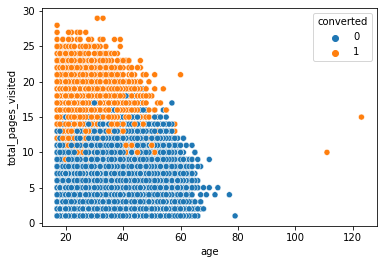

In [96]:
sns.scatterplot(x="age", y="total_pages_visited", data=data,hue='converted')

Pretty nice plot to demonstrate that the older is our user, more times he needs to visit the page before beeng converted.

## Machine learning preprocessing


...


In [97]:
features_list = ['country','age','new_user','source','total_pages_visited',]
numeric_indices = [1,4]
categorical_indices = [0,2,3]
target_variable = 'converted'

In [98]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [99]:
X = data.loc[:, features_list]
Y = data.loc[:, target_variable]

print('Variables explicatives : ', X.columns)
print()

Variables explicatives :  Index(['country', 'age', 'new_user', 'source', 'total_pages_visited'], dtype='object')



In [100]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [101]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
print("...Done")

print(X_train[0:5,:])
print(X_test[0:2,:])
print()
print(Y_train[0:5])
print(Y_test[0:2])

Convert pandas DataFrames to numpy arrays...
...Done
[['China' 23 0 'Direct' 4]
 ['US' 25 1 'Direct' 8]
 ['US' 32 1 'Seo' 2]
 ['US' 37 1 'Seo' 3]
 ['UK' 24 1 'Direct' 4]]
[['US' 20 1 'Ads' 7]
 ['US' 31 1 'Seo' 5]]

[0 0 0 0 0]
[0 0]


## Training pipeline

In [102]:
# Put here all the preprocessings
print("Encoding categorical features and standardizing numerical features...")

categorical_transformer = Pipeline(
    steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # missing values will be replaced by columns' median
    ('scaler', StandardScaler())
])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_indices),
        ('cat', categorical_transformer, categorical_indices)
    ])


# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train[0:5,:])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5,:])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test[0:5,:])
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:])
print()

Encoding categorical features and standardizing numerical features...
Performing preprocessings on train set...
[['China' 23 0 'Direct' 4]
 ['US' 25 1 'Direct' 8]
 ['US' 32 1 'Seo' 2]
 ['US' 37 1 'Seo' 3]
 ['UK' 24 1 'Direct' 4]]
...Done.
[[-0.91516278 -0.26070136  0.          0.          0.          0.
   1.          0.        ]
 [-0.67320988  0.93728655  0.          0.          1.          1.
   1.          0.        ]
 [ 0.17362526 -0.85969532  0.          0.          1.          1.
   0.          1.        ]
 [ 0.7785075  -0.56019834  0.          0.          1.          1.
   0.          1.        ]
 [-0.79418633 -0.26070136  0.          1.          0.          1.
   1.          0.        ]]

Performing preprocessings on test set...
[['US' 20 1 'Ads' 7]
 ['US' 31 1 'Seo' 5]
 ['US' 28 0 'Seo' 4]
 ['Germany' 25 1 'Ads' 4]
 ['US' 44 0 'Ads' 7]]
...Done.
[[-1.27809213  0.63778957  0.          0.          1.          1.
   0.          0.        ]
 [ 0.05264881  0.03879562  0.          0

Optimizing parameters with GridSearch.

In [106]:
from sklearn.model_selection import GridSearchCV

params = {"penalty" : ["none", "l2"],
         "C":[0.01,1,5,10]}

classifier=LogisticRegression()
grid_clf = GridSearchCV(classifier, param_grid=params, cv=5)
grid_clf.fit(X_train,Y_train)

print('done...')
print("Hyperparameters that give the best score : ", grid_clf.best_params_)
print("Best score : ", grid_clf.best_score_)

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the

done...
Hyperparameters that give the best score :  {'C': 0.01, 'penalty': 'none'}
Best score :  0.9863463476086849


In [109]:
# Train model
print("Train model...")
classifier=LogisticRegression(C=0.01) # regularized logit with regularization strength chosen by cross-val
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [110]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]



In [111]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[0 0 0 ... 0 0 0]



## Performance assessment

In [112]:
# WARNING : Use the same score as the one that will be used by Kaggle !
# Here, the f1-score will be used to assess the performances on the leaderboard
print("f1-score on train set : ", f1_score(Y_train, Y_train_pred))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred))

f1-score on train set :  0.7516362383740958
f1-score on test set :  0.7502972651605231


In [113]:
# You can also check more performance metrics to better understand what your model is doing
print("Confusion matrix on train set : ")
print(confusion_matrix(Y_train, Y_train_pred))
print()
print("Confusion matrix on test set : ")
print(confusion_matrix(Y_test, Y_test_pred))
print()

Confusion matrix on train set : 
[[247062    837]
 [  2768   5455]]

Confusion matrix on test set : 
[[27407    94]
 [  326   631]]



# Train best classifier on all data and use it to make predictions on X_without_labels

In [114]:
# Concatenate our train and test set to train your best classifier on all data with labels
X = np.append(X_train,X_test,axis=0)
Y = np.append(Y_train,Y_test)

classifier.fit(X,Y)

LogisticRegression(C=0.01)

In [115]:
# Read data without labels
data_without_labels = pd.read_csv('conversion_data_test.csv')
print('Prediction set (without labels) :', data_without_labels.shape)

# Warning : check consistency of features_list (must be the same than the features 
# used by your best classifier)
#features_list = ['total_pages_visited']
X_without_labels = data_without_labels.loc[:, features_list]

# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_without_labels = X_without_labels.values
print("...Done")

print(X_without_labels[0:5,:])

Prediction set (without labels) : (31620, 5)
Convert pandas DataFrames to numpy arrays...
...Done
[['UK' 28 0 'Seo' 16]
 ['UK' 22 1 'Direct' 5]
 ['China' 32 1 'Seo' 1]
 ['US' 32 1 'Ads' 6]
 ['China' 25 0 'Seo' 3]]


In [116]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
X_without_labels = preprocessor.fit_transform(X_without_labels)
print('...Done.')
print(X_without_labels[0:5,:])
print()

Performing preprocessings on train set...
...Done.
[[-0.31512217  3.33913917  0.          1.          0.          0.
   0.          1.        ]
 [-1.03657046  0.03888347  0.          1.          0.          1.
   1.          0.        ]
 [ 0.16584336 -1.16120951  0.          0.          0.          1.
   0.          1.        ]
 [ 0.16584336  0.33890671  0.          0.          1.          1.
   0.          0.        ]
 [-0.67584631 -0.56116302  0.          0.          0.          0.
   0.          1.        ]]



In [117]:
# Make predictions and dump to file
# WARNING : MAKE SURE THE FILE IS A CSV WITH ONE COLUMN NAMED 'converted' AND NO INDEX !
# WARNING : FILE NAME MUST HAVE FORMAT 'conversion_data_test_predictions_[name].csv'
# where [name] is the name of your team/model separated by a '-'
# For example : [name] = AURELIE-model1
data = {
    'converted': classifier.predict(X_without_labels)
}

Y_predictions = pd.DataFrame(columns=['converted'],data=data)
Y_predictions.to_csv('conversion_data_test_predictions_OlgaCatherineHadrian_all_var.csv', index=False)
